In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import pandas_profile
%matplotlib inline


## 1. Reading and Understanding Data


In [2]:
# Importing dataset

leads = pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isna().any()

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                       True
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                       True
Total Time Spent on Website                      False
Page Views Per Visit                              True
Last Activity                                     True
Country                                           True
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                   True
What matters most to you in choosing a course     True
Search                                           False
Magazine                                         False
Newspaper 

It seems that there are so many null values in atleast all the columns

## 2. Data Cleaning and Analysing

In [6]:
(leads.isna().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

##### check if the values are non entered for all columns..

In [7]:
leads.loc[leads.Specialization =="Select"].count()

Prospect ID                                      1942
Lead Number                                      1942
Lead Origin                                      1942
Lead Source                                      1914
Do Not Email                                     1942
Do Not Call                                      1942
Converted                                        1942
TotalVisits                                      1873
Total Time Spent on Website                      1942
Page Views Per Visit                             1873
Last Activity                                    1888
Country                                           919
Specialization                                   1942
How did you hear about X Education               1940
What is your current occupation                  1929
What matters most to you in choosing a course    1929
Search                                           1942
Magazine                                         1942
Newspaper Article           

We see that some columns have value "Select", which means, the customer has not entered anything. 
So we need to consider them as NaN or null 

In [8]:
# Converting 'Select' values to NaN.

leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

In [9]:
(leads.isna().sum()/len(leads))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [10]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Lets drop the columns which have more than 30% null values

In [11]:
columnsToDrop = leads.columns

In [12]:
for i in columnsToDrop:
    if((100*(leads[i].isnull().sum()/len(leads))) >= 30):
        leads.drop(i, 1, inplace = True)

In [13]:
leads.shape

(9240, 27)

In [14]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [15]:
(leads.isna().sum()/len(leads))*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [16]:
colsWithNull = []
for i in leads.columns:
    if (leads[i].isnull().sum()/len(leads))*100 >0:
        colsWithNull.append(i)
print("These columns still have null values we have to deal them \n",colsWithNull  )

These columns still have null values we have to deal them 
 ['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course']


We see that there are still some null values in 7 columns they are --> 
['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course']


### Analising Columns which have Null Values

#### Country Column

In [17]:
leads["Country"].value_counts(dropna=False)/len(leads) * 100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

In [18]:
## as we can see that 70% occupy with India, and around 27% null values are there,
## we can say that they are from India and then around 97% values will be India, so we can drop Country Column too..
leads = leads.drop("Country",axis=1)

####  Analyzing "What is your current occupation" Column

In [19]:
leads['What is your current occupation'].value_counts(dropna=False) /len(leads) * 100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [20]:
# imputing nan with unemployed
leads['What is your current occupation'] = leads["What is your current occupation"].replace(np.nan,"Unemployed")
leads['What is your current occupation'].value_counts(dropna=False) /len(leads) * 100


Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

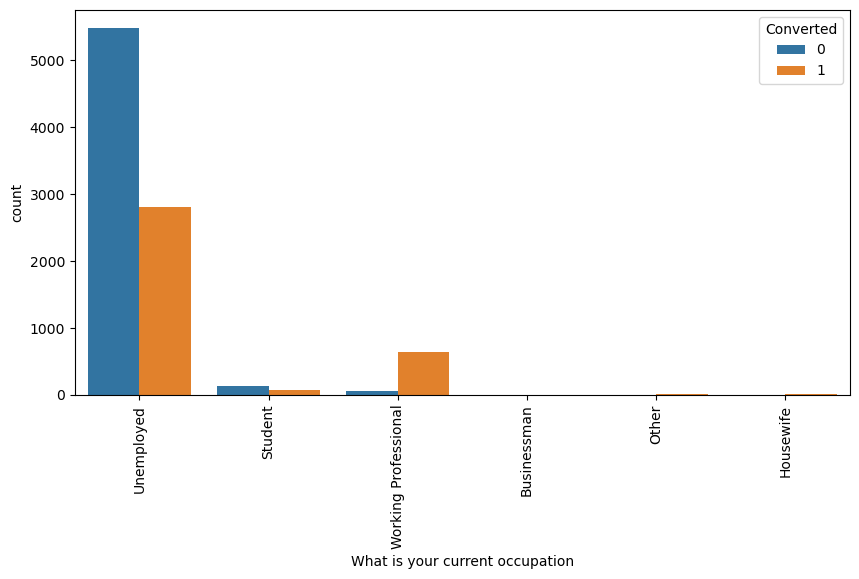

In [21]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=leads['What is your current occupation'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

#### Analising "What matters most to you in choosing a course" column

In [22]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False) / len(leads) * 100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# we can drop this colum as this doesnt suit for our modelling as its compleltly optional for customers
leads = leads.drop(['What matters most to you in choosing a course'],axis=1)

#### Analising "Lead Source" column

In [24]:
leads['Lead Source'].value_counts(dropna=False) / len(leads) * 100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [25]:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')
leads['Lead Source'] = leads['Lead Source'].replace('Facebook','Social Media')
leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home', 'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others')  

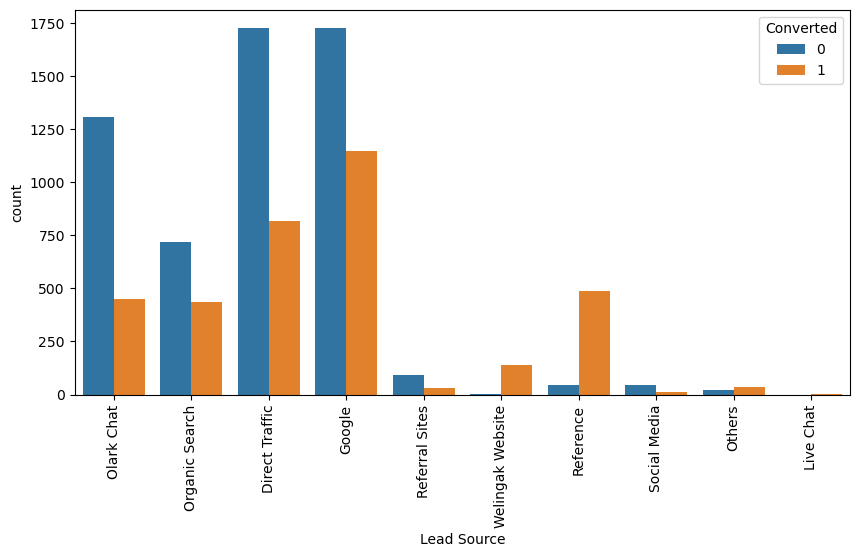

In [26]:
plt.figure(figsize=(10,5))
plot=sns.countplot(x=leads['Lead Source'], hue=leads.Converted)
plot.set_xticklabels(plot.get_xticklabels(),rotation=90)
plt.show()

#### Analising "Last Activity " column

In [27]:
leads['Last Activity'].value_counts(dropna=False)/len(leads)* 100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

In [28]:
leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails', 'Visited Booth in Tradeshow'],'Others')

In [29]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply 

In [30]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [31]:
leads.shape

(9103, 25)

In [32]:
leads['Do Not Call'].value_counts(dropna=False)/len(leads) *100

No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64

we can remove "Do Not Call " Col as well

In [33]:
leads.drop("Do Not Call",axis=1, inplace=True)

In [34]:
leads["Do Not Email"].value_counts(dropna=False)/len(leads) * 100

No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64

In [35]:
leads["Search"].value_counts(dropna=False)/len(leads) * 100

No     99.846205
Yes     0.153795
Name: Search, dtype: float64

In [36]:
# we can drop Search Coloumn also
leads.drop("Search",axis=1,inplace=True)

In [37]:
leads["Magazine"].value_counts(dropna=False)/len(leads) * 100


No    100.0
Name: Magazine, dtype: float64

In [38]:
# we can drop Magazine Coloumn also
leads.drop("Magazine",axis=1,inplace=True)

In [39]:
leads["Newspaper Article"].value_counts(dropna=False)/len(leads) * 100


No     99.978029
Yes     0.021971
Name: Newspaper Article, dtype: float64

In [40]:
# we can drop Newspaper Article Coloumn also
leads.drop("Newspaper Article",axis=1,inplace=True)

In [41]:
leads["X Education Forums"].value_counts(dropna=False)/len(leads) * 100


No     99.989015
Yes     0.010985
Name: X Education Forums, dtype: float64

In [42]:
# we can drop X Education Forums Coloumn also
leads.drop("X Education Forums",axis=1,inplace=True)

In [43]:
leads["Newspaper"].value_counts(dropna=False)/len(leads) * 100

No     99.989015
Yes     0.010985
Name: Newspaper, dtype: float64

In [44]:
# we can drop Newspaper Coloumn also
leads.drop("Newspaper",axis=1,inplace=True)

In [45]:
leads["Digital Advertisement"].value_counts(dropna=False)/len(leads) * 100

No     99.956058
Yes     0.043942
Name: Digital Advertisement, dtype: float64

In [46]:
# we can drop Digital Advertisement Coloumn also
leads.drop("Digital Advertisement",axis=1,inplace=True)

In [47]:
leads["Through Recommendations"].value_counts(dropna=False)/len(leads) * 100

No     99.923102
Yes     0.076898
Name: Through Recommendations, dtype: float64

In [48]:
# we can drop Through Recommendations Coloumn also
leads.drop("Through Recommendations",axis=1,inplace=True)

In [49]:
leads["Receive More Updates About Our Courses"].value_counts(dropna=False)/len(leads) * 100


No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [50]:
# we can drop Receive More Updates About Our Courses Coloumn also
leads.drop("Receive More Updates About Our Courses",axis=1,inplace=True)

In [51]:
leads["Update me on Supply Chain Content"].value_counts(dropna=False)/len(leads) * 100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [52]:
# we can drop Update me on Supply Chain Content Coloumn also
leads.drop("Update me on Supply Chain Content",axis=1,inplace=True)

In [53]:
leads["Get updates on DM Content"].value_counts(dropna=False)/len(leads) * 100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [54]:
# we can drop Get updates on DM Content Coloumn also
leads.drop("Get updates on DM Content",axis=1,inplace=True)

In [55]:
leads["I agree to pay the amount through cheque"].value_counts(dropna=False)/len(leads) * 100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [56]:
# we can drop I agree to pay the amount through cheque Coloumn also
leads.drop("I agree to pay the amount through cheque",axis=1,inplace=True)

In [57]:
leads['Last Notable Activity'].value_counts(dropna=False)/len(leads)* 100

Modified                        35.922223
Email Opened                    31.055696
SMS Sent                        23.860266
Page Visited on Website          3.493354
Olark Chat Conversation          2.010326
Email Link Clicked               1.900472
Email Bounced                    0.659123
Unsubscribed                     0.516313
Unreachable                      0.351532
Had a Phone Conversation         0.153795
Email Marked Spam                0.021971
Approached upfront               0.010985
Resubscribed to emails           0.010985
View in browser link Clicked     0.010985
Form Submitted on Website        0.010985
Email Received                   0.010985
Name: Last Notable Activity, dtype: float64

In [58]:
last = leads['Last Notable Activity'].value_counts(dropna=False)/len(leads)* 100
colsToReplace = []
for i in range(len(last)) :
    if last.iloc[i] < 1:
       colsToReplace.append(last.index.values[i])
colsToReplace

['Email Bounced',
 'Unsubscribed',
 'Unreachable',
 'Had a Phone Conversation',
 'Email Marked Spam',
 'Approached upfront',
 'Resubscribed to emails',
 'View in browser link Clicked',
 'Form Submitted on Website',
 'Email Received']

In [59]:
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(colsToReplace,'Other_Notable_Activity')
leads['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_Activity      160
Name: Last Notable Activity, dtype: int64

In [60]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [61]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9103 non-null   object 
 1   Lead Number                             9103 non-null   int64  
 2   Lead Origin                             9103 non-null   object 
 3   Lead Source                             9103 non-null   object 
 4   Do Not Email                            9103 non-null   object 
 5   Converted                               9103 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9103 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

### Dealing with Outliers

In [62]:
leads.describe([0.25,0.50,0.75,0.90,0.95,0.99,0.999,0.9999])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
95%,655337.900000,1.000000,10.000000,1556.900000,6.000000
99%,659561.860000,1.000000,17.000000,1838.960000,9.000000


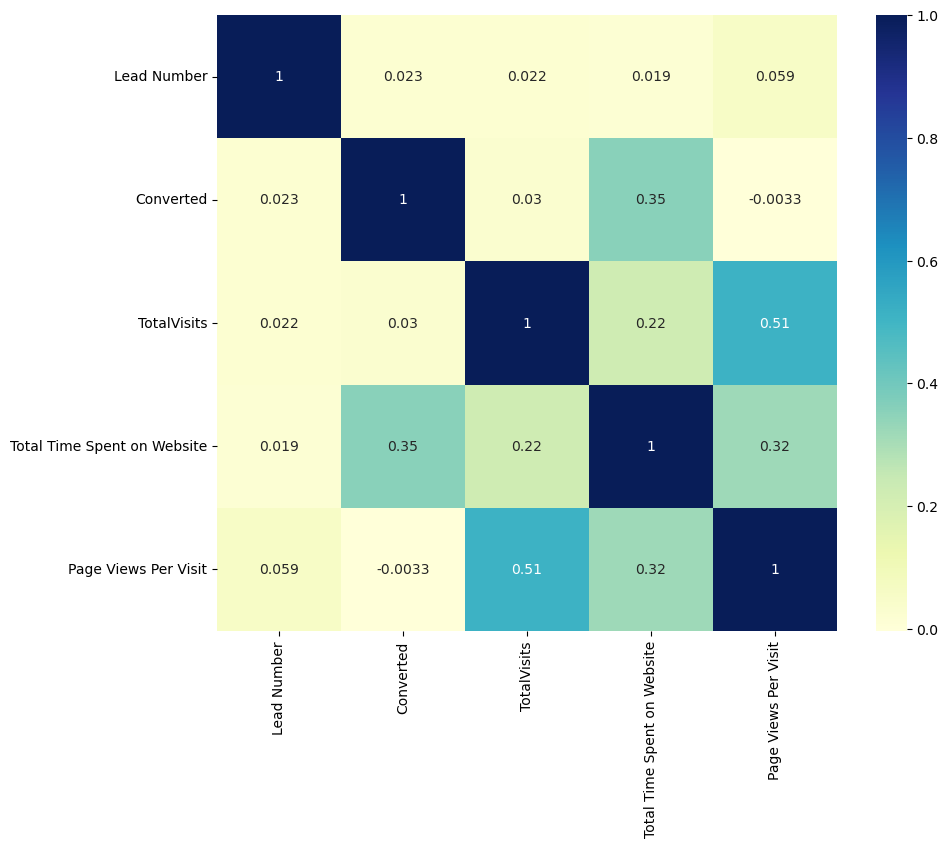

In [63]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads.corr(), cmap="YlGnBu", annot=True)
plt.show()

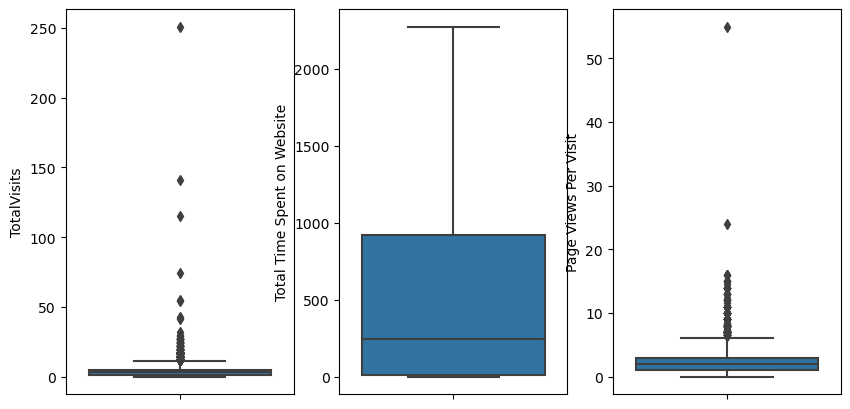

In [64]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits',  data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit',  data = leads)
plt.show()

we see that there are clearly outliers in "Total Visits" and "Page Views per Visit"

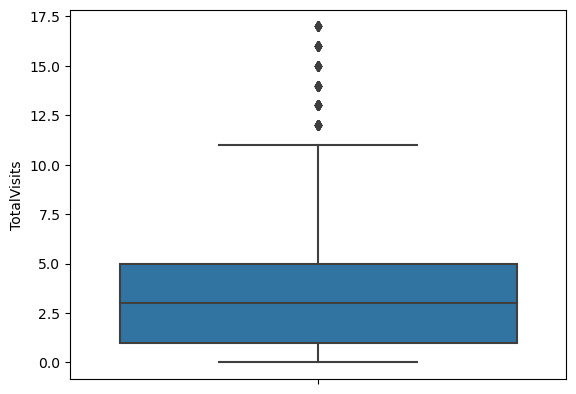

In [65]:
# removing top and bottom 1% of outliers
Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [66]:
leads.shape

(9020, 13)

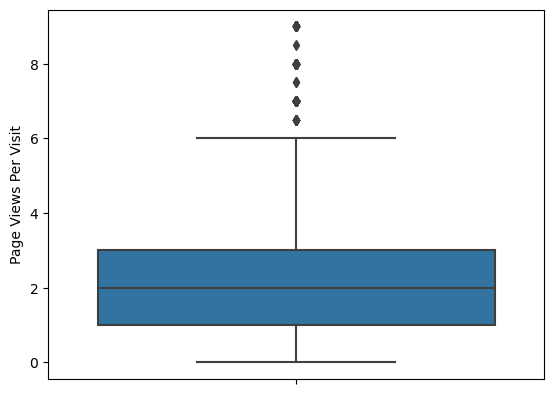

In [67]:
# removing top and bottom 1% of outliers
Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[(leads['Page Views Per Visit'] <= Q3)]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[(leads['Page Views Per Visit'] >= Q1)]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [68]:
leads.shape

(8953, 13)

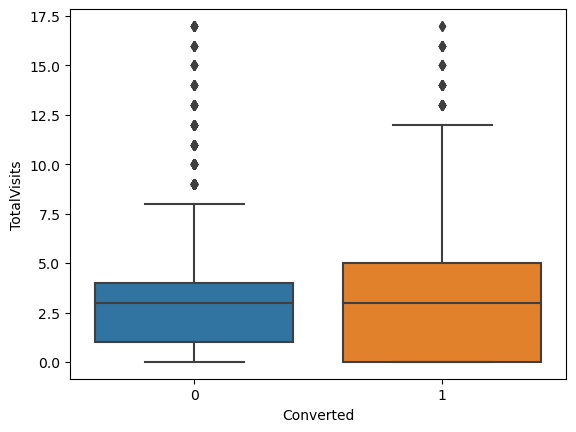

In [69]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

the median of converted and not converted are almost close, hence, we cant get much information from thi

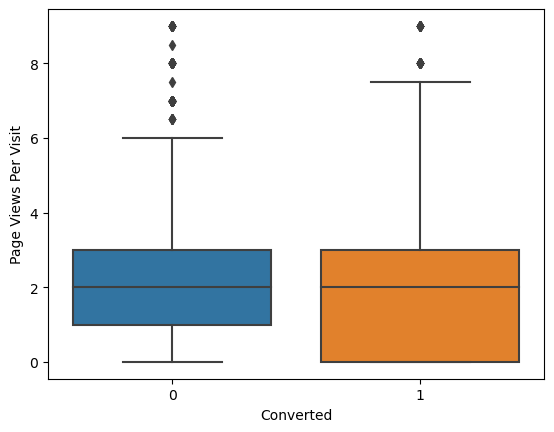

In [70]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

Nothing can be concluded from this spread, as the median is same across both


In [71]:
# checking for null value %
leads.isnull().sum()/len(leads) * 100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

Seems all the missing values are treated enough

## 3. Creating Dummy Variables

In [72]:
# renaming "What is your current occupation" to " current Occupation" for readability
leads.rename(columns={'What is your current occupation':'Current_Occupation'},inplace=True)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Current_Occupation', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [73]:
# categorical columns
cat_cols =  leads.select_dtypes(include=[object]).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Last Activity', 'Current_Occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [74]:
# binary variables to map Yes to 1 and No to 0
binaryVars = ['A free copy of Mastering The Interview','Do Not Email']
print(leads[binaryVars].head())

leads[binaryVars] = leads[binaryVars].apply( lambda x: x.map({'Yes':1,"No":0}))
leads[binaryVars].head()

  A free copy of Mastering The Interview Do Not Email
0                                     No           No
1                                     No           No
2                                    Yes           No
3                                     No           No
4                                     No           No


,A free copy of Mastering The Interview,Do Not Email
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [75]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Current_Occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [76]:
# creating dummies and dropping the first column and adding the results to the leads dataframe
dummy = pd.get_dummies(leads[['Lead Origin','Current_Occupation']], drop_first=True)

In [77]:
leads = pd.concat([leads,dummy],axis=1)

In [78]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,Current_Occupation_Unemployed,Current_Occupation_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,...,0,Modified,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,...,0,Email Opened,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,...,1,Email Opened,1,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,...,0,Modified,1,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,...,0,Modified,1,0,0,0,0,0,1,0


In [79]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Prospect ID                              8953 non-null   object 
 1   Lead Number                              8953 non-null   int64  
 2   Lead Origin                              8953 non-null   object 
 3   Lead Source                              8953 non-null   object 
 4   Do Not Email                             8953 non-null   int64  
 5   Converted                                8953 non-null   int64  
 6   TotalVisits                              8953 non-null   float64
 7   Total Time Spent on Website              8953 non-null   int64  
 8   Page Views Per Visit                     8953 non-null   float64
 9   Last Activity                            8953 non-null   object 
 10  Current_Occupation                       8953 no

In [80]:
dummy = pd.get_dummies(leads[['Lead Source','Last Activity','Last Notable Activity']])
dummy.columns


Index(['Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_Activity',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_SMS Sent'],
      dtype='o

In [81]:
dummy = dummy.drop(['Lead Source_Others','Last Activity_Others','Last Notable Activity_Other_Notable_Activity'],axis=1)
leads = pd.concat([leads,dummy],axis=1)
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Current_Occupation', 'A free copy of Mastering The Interview',
       'Last Notable Activity', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Current_Occupation_Housewife', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Emai

In [82]:
# we will now drop the original columns from which we created dummy columns
leads.drop(cat_cols,axis=1, inplace=True)
leads.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Current_Occupation_Housewife',
       'Current_Occupation_Other', 'Current_Occupation_Student',
       'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
     

In [83]:
len(leads.columns)

36

## 4. Train Test Split And Logistic Regresion Model

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
y = leads.Converted
x = leads.drop('Converted',axis=1)

In [86]:
# splitting data into tran and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=100)

In [87]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6267, 35) (6267,)
(2686, 35) (2686,)


In [88]:
x_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,579918,5.0,1490,5.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4696,614744,3.0,457,3.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3274,628615,4.0,126,2.00,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2164,639044,2.0,393,2.00,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1667,643101,4.0,1167,1.33,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [89]:
# We now need to scale the data using transform, 
# we dont want to scale the data to minmax as we want to make the model learn about this data we use original scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [90]:
numer_cols = x_train.select_dtypes(include=['float','int']).columns
x_train[numer_cols] = scaler.fit_transform(x_train[numer_cols])
x_train.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
9196,-1.602170,0.668862,1.848117,1.455819,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4696,-0.099972,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3274,0.498345,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2164,0.948193,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1667,1.123189,0.319082,1.258415,-0.481679,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [91]:
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.92025019546521

### We have almost 38% of conversion rate

## 5. Model building using Stats Model and Rfe

In [92]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection   import RFE

In [93]:
logReg = LogisticRegression()
rfe = RFE(logReg,n_features_to_select=15).fit(x_train,y_train)
rfe.support_


array([False, False,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False,  True, False, False,  True,  True, False, False])

In [94]:
df = pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=["Features",'Support','Ranking'])
df.sort_values('Ranking')

,Features,Support,Ranking
12,Lead Source_Direct Traffic,True,1
22,Last Activity_Email Bounced,True,1
20,Lead Source_Welingak Website,True,1
28,Last Activity_SMS Sent,True,1
18,Lead Source_Referral Sites,True,1
16,Lead Source_Organic Search,True,1
13,Lead Source_Google,True,1
11,Current_Occupation_Working Professional,True,1
10,Current_Occupation_Unemployed,True,1
26,Last Activity_Olark Chat Conversation,True,1


In [95]:
# list of RFE supported features only
cols = x_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Current_Occupation_Housewife', 'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 1

In [96]:
x_train_sm = sm.add_constant(x_train[cols])
logM1 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logM1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.3
Date:                Mon, 19 Jun 2023   Deviance:                       5280.7
Time:                        13:21:01   Pearson chi2:                 6.55e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3850
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.3099      0.236      1.313      0.189      -0.153       0.773
Total Time Spent on Website                       1.0914      0.040     27.508      0.000       1.014       1.169
Lead Origin_Lead Add Form                         3.0033      0.248     12.114      0.000       2.517       3.489
Current_Occupation_Housewife                     22.8176   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
Current_Occupation_Unemployed                    -0.3533      0.226     -1.561      0.119      -0.797       0.090
Current_Occupation_Working Professional           2.4476      0.295      8.288      0.000       1.869       3.026
Lead Source_Direct Traffic                       -1.4663      0.114    -12.897      0.000      -1.689      -1.243
Lead Source_Google                               -1.0051      0.108     -9.281      0.000      -1.217      -0.793
Lead Source_Organic Search                       -1.1452      0.132     -8.664      0.000      -1.404      -0.886
Lead Source_Referral Sites                       -1.3463      0.337     -3.989      0.000      -2.008      -0.685
Lead Source_Welingak Website                      2.3107      1.040      2.221      0.026       0.272       4.350
Last Activity_Email Bounced                      -1.4118      0.322     -4.381      0.000      -2.043      -0.780
Last Activity_Olark Chat Conversation            -0.9441      0.195     -4.848      0.000      -1.326      -0.562
Last Activity_SMS Sent                            1.2046      0.074     16.226      0.000       1.059       1.350
Last Notable Activity_Modified                   -0.8602      0.083    -10.394      0.000      -1.022      -0.698
Last Notable Activity_Olark Chat Conversation    -1.1871      0.420     -2.827      0.005      -2.010      -0.364
=================================================================================================================
"""

notice the p values of Current_Occupation _Housewife is high, so we shall drop it

In [97]:
cols = cols.drop('Current_Occupation_Housewife',1)
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Current_Occupation_Unemployed',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 2

In [98]:
x_train_sm = sm.add_constant(x_train[cols])
logM2 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logM2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2644.0
Date:                Mon, 19 Jun 2023   Deviance:                       5288.1
Time:                        13:21:01   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3842
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.4066      0.231      1.761      0.078      -0.046       0.859
Total Time Spent on Website                       1.0900      0.040     27.503      0.000       1.012       1.168
Lead Origin_Lead Add Form                         3.0126      0.248     12.159      0.000       2.527       3.498
Current_Occupation_Unemployed                    -0.4531      0.221     -2.053      0.040      -0.886      -0.020
Current_Occupation_Working Professional           2.3475      0.291      8.068      0.000       1.777       2.918
Lead Source_Direct Traffic                       -1.4655      0.114    -12.896      0.000      -1.688      -1.243
Lead Source_Google                               -1.0004      0.108     -9.244      0.000      -1.212      -0.788
Lead Source_Organic Search                       -1.1325      0.132     -8.586      0.000      -1.391      -0.874
Lead Source_Referral Sites                       -1.3428      0.337     -3.980      0.000      -2.004      -0.682
Lead Source_Welingak Website                      2.3037      1.040      2.214      0.027       0.265       4.343
Last Activity_Email Bounced                      -1.4165      0.322     -4.397      0.000      -2.048      -0.785
Last Activity_Olark Chat Conversation            -0.9505      0.195     -4.882      0.000      -1.332      -0.569
Last Activity_SMS Sent                            1.2025      0.074     16.201      0.000       1.057       1.348
Last Notable Activity_Modified                   -0.8580      0.083    -10.380      0.000      -1.020      -0.696
Last Notable Activity_Olark Chat Conversation    -1.1849      0.420     -2.823      0.005      -2.008      -0.362
=================================================================================================================
"""

notice the p values of Current_Occupation_Unemployed is high, so we shall drop it

In [99]:
cols = cols.drop('Current_Occupation_Unemployed',1)
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 3

In [100]:
x_train_sm = sm.add_constant(x_train[cols])
logM3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logM3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2646.1
Date:                Mon, 19 Jun 2023   Deviance:                       5292.2
Time:                        13:21:01   Pearson chi2:                 6.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3838
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0308      0.090     -0.344      0.731      -0.206       0.145
Total Time Spent on Website                       1.0908      0.040     27.524      0.000       1.013       1.168
Lead Origin_Lead Add Form                         3.0313      0.248     12.236      0.000       2.546       3.517
Current_Occupation_Working Professional           2.7877      0.197     14.149      0.000       2.402       3.174
Lead Source_Direct Traffic                       -1.4621      0.114    -12.872      0.000      -1.685      -1.240
Lead Source_Google                               -1.0051      0.108     -9.291      0.000      -1.217      -0.793
Lead Source_Organic Search                       -1.1369      0.132     -8.625      0.000      -1.395      -0.879
Lead Source_Referral Sites                       -1.3572      0.337     -4.025      0.000      -2.018      -0.696
Lead Source_Welingak Website                      2.2736      1.040      2.186      0.029       0.235       4.312
Last Activity_Email Bounced                      -1.4177      0.322     -4.398      0.000      -2.049      -0.786
Last Activity_Olark Chat Conversation            -0.9436      0.195     -4.849      0.000      -1.325      -0.562
Last Activity_SMS Sent                            1.1926      0.074     16.118      0.000       1.048       1.338
Last Notable Activity_Modified                   -0.8588      0.083    -10.395      0.000      -1.021      -0.697
Last Notable Activity_Olark Chat Conversation    -1.1815      0.420     -2.814      0.005      -2.004      -0.359
=================================================================================================================
"""

notice the p values of Lead Source_Welingak Website is high, so we shall drop it


In [101]:
cols = cols.drop('Lead Source_Welingak Website',1)
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Current_Occupation_Working Professional', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

### Model 4

In [102]:
x_train_sm = sm.add_constant(x_train[cols])
logM4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res = logM4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2650.7
Date:                Mon, 19 Jun 2023   Deviance:                       5301.3
Time:                        13:21:01   Pearson chi2:                 6.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3829
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0323      0.090     -0.361      0.718      -0.208       0.143
Total Time Spent on Website                       1.0906      0.040     27.528      0.000       1.013       1.168
Lead Origin_Lead Add Form                         3.3562      0.239     14.028      0.000       2.887       3.825
Current_Occupation_Working Professional           2.7815      0.197     14.099      0.000       2.395       3.168
Lead Source_Direct Traffic                       -1.4611      0.114    -12.864      0.000      -1.684      -1.238
Lead Source_Google                               -1.0043      0.108     -9.284      0.000      -1.216      -0.792
Lead Source_Organic Search                       -1.1360      0.132     -8.620      0.000      -1.394      -0.878
Lead Source_Referral Sites                       -1.3556      0.337     -4.021      0.000      -2.016      -0.695
Last Activity_Email Bounced                      -1.3929      0.318     -4.386      0.000      -2.015      -0.770
Last Activity_Olark Chat Conversation            -0.9400      0.195     -4.831      0.000      -1.321      -0.559
Last Activity_SMS Sent                            1.1949      0.074     16.156      0.000       1.050       1.340
Last Notable Activity_Modified                   -0.8610      0.083    -10.424      0.000      -1.023      -0.699
Last Notable Activity_Olark Chat Conversation    -1.1410      0.412     -2.768      0.006      -1.949      -0.333
=================================================================================================================
"""

Since all p values are less, we should now check Variance Inflation Factor to check if any correlation betwen variables are present

### VIF correlation

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [104]:
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,1.97
8,Last Activity_Olark Chat Conversation,1.74
9,Last Activity_SMS Sent,1.48
4,Lead Source_Google,1.45
3,Lead Source_Direct Traffic,1.37
11,Last Notable Activity_Olark Chat Conversation,1.33
1,Lead Origin_Lead Add Form,1.22
0,Total Time Spent on Website,1.20
5,Lead Source_Organic Search,1.17
2,Current_Occupation_Working Professional,1.14


Seems like all the values are in order.

### Deriving Probabilities , lead score and predictions on train data

In [105]:
y_train_pred = res.predict(x_train_sm)
y_train_pred.head()

9196    0.897882
4696    0.415869
3274    0.367702
2164    0.047136
1667    0.583175
dtype: float64

In [106]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.89788162, 0.41586887, 0.36770209, 0.04713587, 0.58317467,
       0.27218141, 0.04459105, 0.17583792, 0.05815911, 0.13525561])

In [107]:
y_train_pred_final = pd.DataFrame({  'ID':y_train.index,"Converted": y_train.values,'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,ID,Converted,Converted_Prob
0,9196,1,0.897882
1,4696,0,0.415869
2,3274,0,0.367702
3,2164,0,0.047136
4,1667,1,0.583175


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [108]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,ID,Converted,Converted_Prob,Predicted
0,9196,1,0.897882,1
1,4696,0,0.415869,0
2,3274,0,0.367702,0
3,2164,0,0.047136,0
4,1667,1,0.583175,1


#### Creating Confusion matrix

In [109]:
from sklearn import metrics

In [110]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3441  441]
 [ 744 1641]]


In [111]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8109143130684539


In [112]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("true positive ",TP)
print("true negatives ",TN)
print("false positive ",FP)
print("false negatives ",FN)

true positive  1641
true negatives  3441
false positive  441
false negatives  744


In [113]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity = ",sensitivity * 100)

Sensitivity =  68.80503144654088


In [114]:
# Specificity
specificity = TN / float(TN+FP)
print("Specificity = ",specificity * 100)

Specificity =  88.63987635239567


In [115]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FPR= FP/ float(TN+FP)
print("False Positive Rate = ",FPR * 100)

False Positive Rate =  11.360123647604329


In [116]:
# Calculate positive Predictive value
positive= TP/ float(TP+FP)
print(" Positive predictive  = ",positive * 100)

 Positive predictive  =  78.81844380403457


In [117]:
# Calculate negative Predictive value
negative= TN/ float(TN+FN)
print(" negative predictive  = ",negative * 100)

 negative predictive  =  82.22222222222221


## 6. Plotting ROC curve and Finding optimal cut off ranges

In [118]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Lead Score Trend')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [119]:
y_train_pred_final

,ID,Converted,Converted_Prob,Predicted
0,9196,1,0.897882,1
1,4696,0,0.415869,0
2,3274,0,0.367702,0
3,2164,0,0.047136,0
4,1667,1,0.583175,1
...,...,...,...,...
6262,379,1,0.081448,0
6263,84,1,0.357334,0
6264,8313,0,0.095834,0
6265,7169,0,0.272181,0


In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

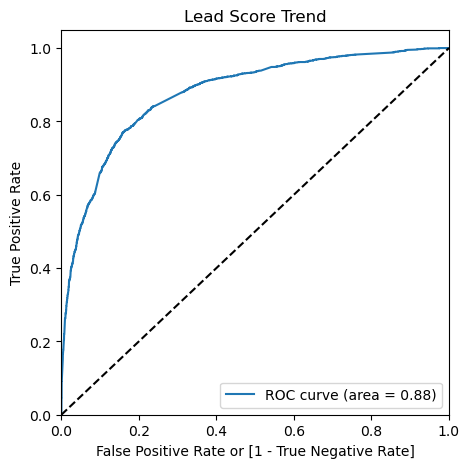

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC Curve should be close to 1. We are getting a good value of 0.88 indicating a good predictive model.

### Finding Optimal Cutoff points

Above we had chosen an arbitrary cut-off value of 0.5. 
Now we will look at all the cut off from 0.1 to 0.9 to see ranges

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(1,10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,ID,Converted,Converted_Prob,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9196,1,0.897882,1,1,1,1,1,1,1,1,1,0
1,4696,0,0.415869,0,1,1,1,1,0,0,0,0,0
2,3274,0,0.367702,0,1,1,1,0,0,0,0,0,0
3,2164,0,0.047136,0,0,0,0,0,0,0,0,0,0
4,1667,1,0.583175,1,1,1,1,1,1,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.591671  0.963522  0.363215
0.2   0.2  0.729057  0.912788  0.616177
0.3   0.3  0.796873  0.828931  0.777177
0.4   0.4  0.812670  0.753040  0.849304
0.5   0.5  0.810914  0.688050  0.886399
0.6   0.6  0.794479  0.576520  0.928387
0.7   0.7  0.781714  0.503564  0.952602
0.8   0.8  0.757141  0.405870  0.972952
0.9   0.9  0.718526  0.279665  0.988150


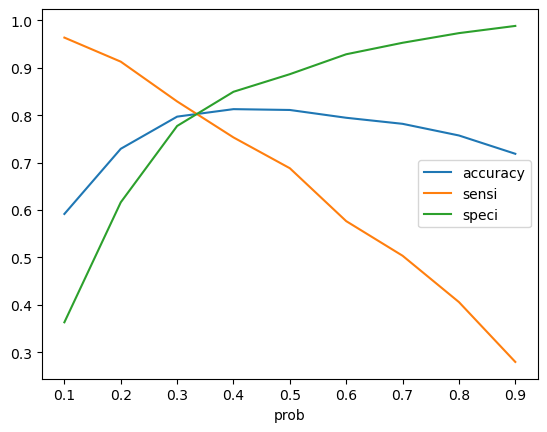

In [124]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [125]:
y_train_pred_final.head()

,ID,Converted,Converted_Prob,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,9196,1,0.897882,1,1,1,1,1,1,1,1,1,0
1,4696,0,0.415869,0,1,1,1,1,0,0,0,0,0
2,3274,0,0.367702,0,1,1,1,0,0,0,0,0,0
3,2164,0,0.047136,0,0,0,0,0,0,0,0,0,0
4,1667,1,0.583175,1,1,1,1,1,1,0,0,0,0


In [126]:
#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.33 else 0)

y_train_pred_final.head()

,ID,Converted,Converted_Prob,Predicted,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,9196,1,0.897882,1,1,1,1,1,1,1,1,1,0,1
1,4696,0,0.415869,0,1,1,1,1,0,0,0,0,0,1
2,3274,0,0.367702,0,1,1,1,0,0,0,0,0,0,1
3,2164,0,0.047136,0,0,0,0,0,0,0,0,0,0,0
4,1667,1,0.583175,1,1,1,1,1,1,0,0,0,0,1


In [127]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['ID','Converted','Converted_Prob','final_Predicted','Lead_Score']].head()

,ID,Converted,Converted_Prob,final_Predicted,Lead_Score
0,9196,1,0.897882,1,90
1,4696,0,0.415869,1,42
2,3274,0,0.367702,1,37
3,2164,0,0.047136,0,5
4,1667,1,0.583175,1,58


In [128]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8002233923727461

In [129]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3087,  795],
       [ 457, 1928]])

In [130]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives
print("true positive ",TP)
print("true negatives ",TN)
print("false positive ",FP)
print("false negatives ",FN)

true positive  1928
true negatives  3087
false positive  795
false negatives  457


In [131]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity = ",sensitivity * 100)

Sensitivity =  80.83857442348008


In [132]:
# Specificity
specificity = TN / float(TN+FP)
print("Specificity = ",specificity * 100)

Specificity =  79.52086553323029


### Observation:
#### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.88, which is very good. We have the following values for the Train Data:

##### Accuracy : 80%

##### Sensitivity : 80.83%

##### Specificity : 79.5%

In [133]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FPR= FP/ float(TN+FP)
print("False Positive Rate = ",FPR * 100)

False Positive Rate =  20.479134466769704


In [134]:
# Calculate positive Predictive value
positive= TP/ float(TP+FP)
print(" Positive predictive  = ",positive * 100)

 Positive predictive  =  70.80426000734484


In [135]:
# Calculate negative Predictive value
negative= TN/ float(TN+FN)
print(" negative predictive  = ",negative * 100)

 negative predictive  =  87.10496613995485


#### We can see that the final prediction of conversions have a target of  80.83% ~ 81% conversion as per the X Educations CEO's requirement . 
#### Hence this is a good model.

### Precision and Recall

In [136]:
from sklearn.metrics import precision_score, recall_score

In [137]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.7080426000734484

In [138]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8083857442348008

In [139]:
from sklearn.metrics import precision_recall_curve

In [140]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

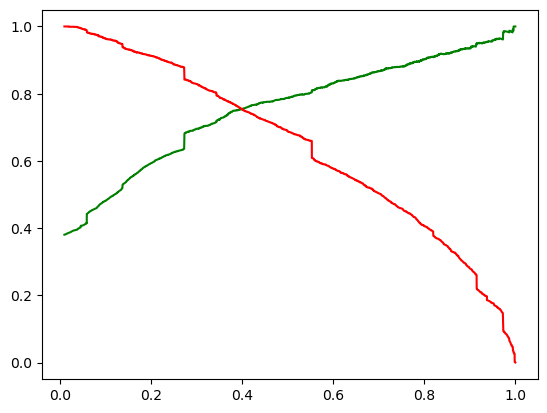

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Verifying with test data sets

In [142]:
numCols=x_test.select_dtypes(include=['float', 'int']).columns

x_test[numCols] = scaler.fit_transform(x_test[numCols])

x_test.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current_Occupation_Housewife,Current_Occupation_Other,Current_Occupation_Student,...,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7681,-1.102149,0.575687,-0.311318,0.092860,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
984,1.382751,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8135,-1.238114,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
6915,-0.863216,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2712,0.706901,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [143]:
x_test = x_test[cols]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Current_Occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
7681,-0.311318,0,0,1,0,0,0,0,0,1,0,0
984,-0.550262,0,0,0,0,1,0,0,0,1,1,0
8135,0.812462,0,0,1,0,0,0,0,0,1,0,0
6915,-0.628665,0,0,0,1,0,0,0,0,0,0,0
2712,-0.421456,0,0,0,1,0,0,0,0,0,0,0


In [144]:
x_test_sm = sm.add_constant(x_test)

### Predictions on test set

In [145]:
y_test_pred = res.predict(x_test_sm)

In [146]:
y_test_pred

7681    0.345691
984     0.192376
8135    0.642818
6915    0.151572
2712    0.182973
          ...   
9029    0.056993
1420    0.036189
5996    0.063328
4143    0.062768
1005    0.365793
Length: 2686, dtype: float64

In [147]:
# as y_test_pred is an arrya, we need to convert to dataframe
y_pred_df = pd.DataFrame(data=y_test_pred,columns=["Converted_Prob"])
y_pred_df.head()

,Converted_Prob
7681,0.345691
984,0.192376
8135,0.642818
6915,0.151572
2712,0.182973


In [148]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
7681,0
984,0
8135,0
6915,0
2712,1


In [149]:
y_test_df['ID'] = y_test_df.index
y_test_df.head()

,Converted,ID
7681,0,7681
984,0,984
8135,0,8135
6915,0,6915
2712,1,2712


In [150]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,ID,Converted_Prob
0,0,7681,0.345691
1,0,984,0.192376
2,0,8135,0.642818
3,0,6915,0.151572
4,1,2712,0.182973


In [152]:
# Rearranging the columns
y_pred_final = y_pred_final[['ID','Converted','Converted_Prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [153]:
y_pred_final.head()

,ID,Converted,Converted_Prob,Lead_Score
0,7681,0,0.345691,35
1,984,0,0.192376,19
2,8135,0,0.642818,64
3,6915,0,0.151572,15
4,2712,1,0.182973,18


In [154]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [155]:
y_pred_final.head()

,ID,Converted,Converted_Prob,Lead_Score,final_Predicted
0,7681,0,0.345691,35,1
1,984,0,0.192376,19,0
2,8135,0,0.642818,64,1
3,6915,0,0.151572,15,0
4,2712,1,0.182973,18,0


In [156]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.802680565897245

In [157]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion3

array([[1336,  340],
       [ 190,  820]])

In [158]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives
print("true positive ",TP)
print("true negatives ",TN)
print("false positive ",FP)
print("false negatives ",FN)

true positive  820
true negatives  1336
false positive  340
false negatives  190


In [159]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
print("Sensitivity = ",sensitivity * 100)

Sensitivity =  81.1881188118812


In [160]:
# Specificity
specificity = TN / float(TN+FP)
print("Specificity = ",specificity * 100)

Specificity =  79.71360381861575


In [161]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
FPR= FP/ float(TN+FP)
print("False Positive Rate = ",FPR * 100)

False Positive Rate =  20.286396181384248


In [162]:
# Calculate positive Predictive value
positive= TP/ float(TP+FP)
print(" Positive predictive  = ",positive * 100)

 Positive predictive  =  70.6896551724138


In [163]:
# Calculate negative Predictive value
negative= TN/ float(TN+FN)
print(" negative predictive  = ",negative * 100)

 negative predictive  =  87.54914809960681


### Observation:
#### After running the model on the Test Data these are the figures we obtain:

##### Accuracy : 80.2%
##### Sensitivity : 81%
##### Specificity : 79.7%

## Final Observation:
Let us compare the values obtained for Train & Test:

### Train Data: 
#### Accuracy : 80%
#### Sensitivity : 80.83%
#### Specificity : 79.5%
### Test Data: 
#### Accuracy : 80.2%
#### Sensitivity : 81%
#### Specificity : 79.7%

# Model

= -0.0323 + Total Time Spent On Website * (1.0906) 
        + Lead Origin_Lead Add Form  * (3.3562)
        + Current_Occupation_Working Professional * (2.7815)
        - Lead Source_Direct Traffice * ( 1.4611)
        - Lead Source_Google * (1.0043)
        - Led Source _Organice Search * (1.1360)
        - Lead Source _Referral Sites *(1.3556)
        - Last Activity_Email Bounced * (1.3929)
        - Last Activity_Olark Chat Conversation * (0.94)
        + Last Activity_Sms Sent * (1.1949)
        - Last Notable Activity_Modified * (0.861)
        - Last Notable Activity_Olark Chat Conversation * (1.141)

# Conclusion:
We can give this model to CEO as the prediction score is overall 80%